# House Prices Advenced Regression Techniques, Kaggle Competation

### Model Implementation and Machine Learning
Now our features are set, we can move on to train the machine for predictions. We'll choose the best model and evaluate them by R2, Root Mean Squared Error, Mean Squared and Absolute Errors.



According to [this medium article](https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b):

' R Square/Adjusted R Square is better used to explain the model to other people because you can explain the number as a percentage of the output variability. MSE, RMSE, or MAE are better be used to compare performance between different regression models'

Since we want to predict accurate house prices, I will use all four error values. 


In [69]:
# Import required packages
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
#ML algoritms
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor 
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor

#Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [120]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(predictors,target, train_size=0.80,
                                                    random_state= 42)
# Check if the data split correctly
print(x_train.shape, x_test.shape)
y_train.shape, y_test.shape

(1164, 794) (292, 794)


((1164,), (292,))

In [26]:
def eval_best_params(model, parameters, X_train, y_train):
    """This function evaluates models best parameters,
    model is base model such as RandomForestRegressor(),"""
    rf = RandomizedSearchCV(estimator= model, param_distributions= parameters, cv=5, verbose=2, n_jobs=-1, )
    rf.fit(X_train,y_train)
    print(rf.best_params_)
 

In [27]:
eval_best_params(RandomForestRegressor(), rfc_params, x_train,y_train)

In [28]:
eval_best_params(GradientBoostingRegressor(), gbr_params, x_train,y_train)

In [29]:
eval_best_params(XGBRegressor(), xgb_params, x_train,y_train)

In [30]:
eval_best_params(CatBoostRegressor(silent=True), cat_params, x_train,y_train)

In [35]:
# GridSearchCV for n_estimators; first change parameters of the models
rfr = RandomForestRegressor(min_samples_split = 25,
                            min_samples_leaf =  1,
                            max_samples = None,
                            max_features = 'auto', 
                            max_leaf_nodes = 5,
                            max_depth = 5, 
                            criterion = 'mae')

gbr = GradientBoostingRegressor(min_samples_split = 25,
                               min_samples_leaf = 100,
                               max_leaf_nodes = 50,
                               max_features = 'auto',
                               loss=  'lad',
                               learning_rate = 0.05,
                               criterion= 'friedman_mse')

xgb = XGBRegressor(min_child_weight = 5,
                    max_depth = 3, 
                    learning_rate = 0.25, 
                    gamma = 0.0, 
                    colsample_bytree = 0.7)

cat = CatBoostRegressor(learning_rate=0.01, l2_leaf_reg = 5, depth = 3, border_count = 50, silent=True)


# now the parameters are set. let's see the n_estimators with GridSearchCV
param_grid = {'n_estimators': [100,200,500,750,1000,2000,5000,10000]}


In [38]:
# RFR
grid_cv = GridSearchCV(estimator = rfr,
                       param_grid= param_grid, cv=5, n_jobs=-1)
grid_cv.fit(x_train, y_train)
print('n_estimators for RandomForest is : ', grid_cv.best_params_)

In [39]:
rfr = RandomForestRegressor(n_estimators = 500,
                            min_samples_split = 10,
                            min_samples_leaf =  3,
                            max_samples = 50,
                            max_features = 'sqrt', 
                            max_leaf_nodes = 2,
                            max_depth = 50, 
                            criterion = 'mae')


In [40]:
# GradientBooost 

grid_cv = GridSearchCV(estimator = gbr,
                       param_grid= param_grid, cv=5, n_jobs=-1)
grid_cv.fit(x_train, y_train)
print('n_estimators for GradientBoost is : ', grid_cv.best_params_)

In [ ]:
GradientBoostingRegressor(n_estimators = 10000,
                          min_samples_split = 10,
                               min_samples_leaf = 3,
                               max_leaf_nodes = 10,
                               max_features = 'sqrt',
                               loss=  'lad',
                               learning_rate = 0.05,
                               criterion= 'friedman_mse')

GradientBoostingRegressor(learning_rate=0.05, loss='lad', max_features='sqrt',
                          max_leaf_nodes=10, min_samples_leaf=3,
                          min_samples_split=10, n_estimators=10000)

In [ ]:
#XGB 
grid_cv = GridSearchCV(estimator = xgb,
                       param_grid= param_grid, cv=5, n_jobs=-1)
grid_cv.fit(x_train, y_train)
print('n_estimators for XGB is : ', grid_cv.best_params_)

In [ ]:
xgb = XGBRegressor(n_estimators = 500,
                   min_child_weight = 5,
                   max_depth = 6,
                   learning_rate = 0.2, 
                   gamma = 0.0,
                   colsample_bytree = 0.3)

In [ ]:
# Cat, see CatBoost document, it uses iterations for n_estimators, num_trees etc. 
grid_cv = GridSearchCV(estimator = cat,
                       param_grid= {'iterations': [1000,2000,5000,10000,20000,50000]} , cv=5, n_jobs=-1)
grid_cv.fit(x_train, y_train)
print('n_estimators for CatBoost is : ', grid_cv.best_params_)

In [157]:

rfr_params = {'max_depth' : [1,5,6,7,8,9,10],
              }

rfr_grid = GridSearchCV(estimator = RandomForestRegressor(), param_grid = rfr_params, cv=5, n_jobs=-1,
                             return_train_score=True)

rfr_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 8, 9, 10]},
             return_train_score=True)

In [158]:
results = pd.DataFrame(rfr_grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.173746,0.255366,0.046781,0.005010,None,{'max_depth': None},0.859267,0.831300,0.879507,0.865645,0.859648,0.859073,0.015700,1,0.979634,0.981931,0.980534,0.979317,0.979367,0.980156,0.000989
1,2.937943,0.076740,0.038042,0.002677,5,{'max_depth': 5},0.828344,0.793333,0.848459,0.834153,0.832763,0.827410,0.018326,5,0.896741,0.903158,0.901457,0.899957,0.902288,0.900720,0.002252
2,4.395871,0.039929,0.043553,0.004911,8,{'max_depth': 8},0.854739,0.820972,0.873255,0.856519,0.852486,0.851594,0.016981,4,0.961661,0.963730,0.961005,0.959931,0.961167,0.961499,0.001250
3,4.738110,0.080708,0.038555,0.001987,9,{'max_depth': 9},0.856361,0.822945,0.877107,0.862610,0.862068,0.856218,0.017992,3,0.969056,0.970587,0.968425,0.968341,0.968808,0.969043,0.000814
4,4.710804,0.651997,0.033245,0.010480,10,{'max_depth': 10},0.862168,0.829138,0.875911,0.865242,0.862880,0.859068,0.015759,2,0.972751,0.975147,0.973500,0.973692,0.974137,0.973845,0.000790


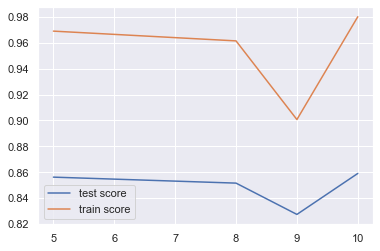

In [168]:
plt.plot(results.param_max_depth.sort_values(ascending=False), results.mean_test_score, label = 'test score')
plt.plot(results.param_max_depth.sort_values(ascending=False), results.mean_train_score, label = 'train score')
plt.legend()
plt.show() 


In [169]:
rfr_params = {'min_samples_split' : [2,5,10,25,50,100],
              }

rfr_grid = GridSearchCV(estimator = RandomForestRegressor(max_depth = 5), param_grid = rfr_params, cv=5, n_jobs=-1,
                             return_train_score=True)

rfr_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=5), n_jobs=-1,
             param_grid={'min_samples_split': [2, 5, 10, 25, 50, 100]},
             return_train_score=True)

In [171]:
results = pd.DataFrame(rfr_grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.816371,0.106125,0.056375,0.005006,2,{'min_samples_split': 2},0.828872,0.799068,0.843976,0.833465,0.836559,0.828388,0.015463,2,0.899092,0.905135,0.900690,0.899884,0.901122,0.901184,0.002094
1,3.527429,0.045715,0.051484,0.008366,5,{'min_samples_split': 5},0.829276,0.803869,0.849227,0.835532,0.832738,0.830128,0.014772,1,0.898302,0.905494,0.899938,0.899157,0.898710,0.900320,0.002643
2,3.487519,0.045339,0.050109,0.005408,10,{'min_samples_split': 10},0.827328,0.793816,0.850272,0.835929,0.834457,0.828360,0.018809,3,0.893445,0.902101,0.896571,0.898387,0.898435,0.897788,0.002819
3,3.070985,0.134056,0.050801,0.007935,25,{'min_samples_split': 25},0.821913,0.793979,0.842449,0.828173,0.828340,0.822971,0.015981,4,0.884857,0.889611,0.885108,0.884503,0.887120,0.886240,0.001916
4,3.125324,0.277828,0.060160,0.037513,50,{'min_samples_split': 50},0.798316,0.784994,0.824042,0.817252,0.817327,0.808386,0.014507,5,0.855012,0.863386,0.859826,0.857423,0.855390,0.858207,0.003105
5,2.704760,0.559166,0.035377,0.009932,100,{'min_samples_split': 100},0.754167,0.745617,0.794320,0.787413,0.770984,0.770500,0.018653,6,0.799830,0.804009,0.810036,0.813470,0.804193,0.806307,0.004836


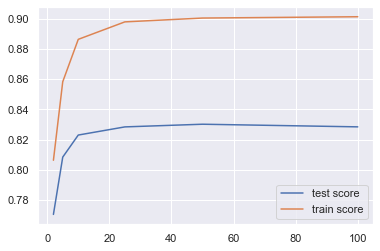

In [173]:
plt.plot(results.param_min_samples_split.sort_values(ascending=False), results.mean_test_score, label = 'test score')
plt.plot(results.param_min_samples_split.sort_values(ascending=False), results.mean_train_score, label = 'train score')
plt.legend()
plt.show() 


In [174]:
rfr_params = {'min_samples_leaf': [1,3,5,10,20,50,100],
              }

rfr_grid = GridSearchCV(estimator = RandomForestRegressor(max_depth = 5, min_samples_split = 5), param_grid = rfr_params, cv=5, n_jobs=-1,
                             return_train_score=True)

rfr_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=5, min_samples_split=5),
             n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 3, 5, 10, 20, 50, 100]},
             return_train_score=True)

In [175]:
results = pd.DataFrame(rfr_grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.152975,0.059642,0.068407,0.018994,1,{'min_samples_leaf': 1},0.822093,0.798564,0.841659,0.828445,0.832436,0.824639,0.014501,4,0.898094,0.903608,0.899612,0.899486,0.901288,0.900418,0.001890
1,3.457810,0.313961,0.043665,0.007180,3,{'min_samples_leaf': 3},0.832185,0.796442,0.849234,0.836591,0.835281,0.829947,0.017733,2,0.893782,0.902120,0.896382,0.898029,0.899032,0.897869,0.002770
2,3.878788,0.084496,0.074795,0.039601,5,{'min_samples_leaf': 5},0.832149,0.795718,0.851606,0.831313,0.845498,0.831257,0.019395,1,0.887459,0.896831,0.890324,0.891915,0.890405,0.891387,0.003080
3,3.594548,0.039327,0.060075,0.008378,10,{'min_samples_leaf': 10},0.833598,0.794268,0.843020,0.830003,0.830927,0.826363,0.016697,3,0.872007,0.878780,0.875705,0.875810,0.873110,0.875082,0.002364
4,2.476167,0.065704,0.047061,0.009128,20,{'min_samples_leaf': 20},0.797641,0.790746,0.821884,0.811053,0.812521,0.806769,0.011135,5,0.845761,0.854811,0.849538,0.847734,0.845225,0.848614,0.003454
5,1.961837,0.192061,0.047603,0.006577,50,{'min_samples_leaf': 50},0.731887,0.719033,0.754861,0.759806,0.728997,0.738917,0.015709,6,0.777017,0.774274,0.771444,0.768855,0.766159,0.771550,0.003838
6,1.178234,0.245123,0.031477,0.007858,100,{'min_samples_leaf': 100},0.666137,0.622459,0.661748,0.644267,0.616777,0.642278,0.019977,7,0.676375,0.665893,0.673493,0.663906,0.666166,0.669167,0.004860


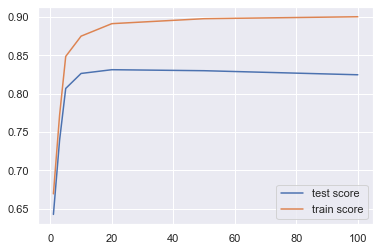

In [176]:
plt.plot(results.param_min_samples_leaf.sort_values(ascending=False), results.mean_test_score, label = 'test score')
plt.plot(results.param_min_samples_leaf.sort_values(ascending=False), results.mean_train_score, label = 'train score')
plt.legend()
plt.show() 

In [199]:
rfr_params = {'max_leaf_nodes' : [None,1,2,5,10,50],
              }

rfr_grid = GridSearchCV(estimator = RandomForestRegressor(max_depth = 5, min_samples_split = 5,
                                                         min_samples_leaf = 10), param_grid = rfr_params, cv=5, n_jobs=-1,
                             return_train_score=True)

rfr_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=5, min_samples_leaf=10,
                                             min_samples_split=5),
             n_jobs=-1, param_grid={'max_leaf_nodes': [None, 1, 2, 5, 10, 50]},
             return_train_score=True)

In [182]:
results = pd.DataFrame(rfr_grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.469408,0.224340,0.048738,0.012639,None,{'max_leaf_nodes': None},0.833400,0.791940,0.846983,0.828323,0.836560,0.827441,0.018771,1,0.875283,0.879335,0.876027,0.874874,0.873845,0.875873,0.001869
1,1.496623,0.125562,0.033545,0.003928,2,{'max_leaf_nodes': 2},0.460886,0.400209,0.491367,0.508988,0.471105,0.466511,0.037070,7,0.478295,0.472996,0.502403,0.488951,0.496003,0.487730,0.010875
2,2.032726,0.055482,0.033240,0.002546,5,{'max_leaf_nodes': 5},0.676577,0.685008,0.724731,0.733520,0.704159,0.704799,0.021958,6,0.728297,0.737763,0.736798,0.742199,0.732868,0.735585,0.004700
3,2.613252,0.067846,0.034743,0.001648,10,{'max_leaf_nodes': 10},0.782215,0.761492,0.798573,0.795525,0.795084,0.786578,0.013745,5,0.819333,0.825783,0.822670,0.823979,0.818629,0.822079,0.002725
4,2.914888,0.102614,0.035999,0.002436,15,{'max_leaf_nodes': 15},0.810884,0.774249,0.827532,0.817126,0.827825,0.811523,0.019714,4,0.853674,0.856312,0.856322,0.855649,0.850978,0.854587,0.002048
5,2.908750,0.037896,0.037110,0.003237,25,{'max_leaf_nodes': 25},0.834275,0.795569,0.843872,0.825724,0.835222,0.826933,0.016701,2,0.872389,0.880481,0.876012,0.875214,0.873857,0.875590,0.002738
6,2.797347,0.119081,0.027361,0.008622,50,{'max_leaf_nodes': 50},0.832670,0.792141,0.843421,0.826637,0.836517,0.826277,0.017917,3,0.872491,0.878253,0.877443,0.875607,0.874625,0.875684,0.002050


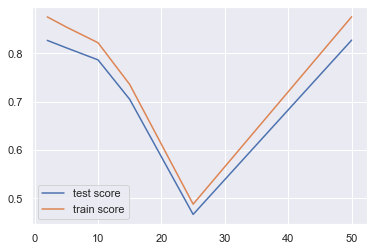

In [183]:
plt.plot(results.param_max_leaf_nodes.sort_values(ascending=False), results.mean_test_score, label = 'test score')
plt.plot(results.param_max_leaf_nodes.sort_values(ascending=False), results.mean_train_score, label = 'train score')
plt.legend()
plt.show() 

In [193]:
rfr_params = {'max_samples': [None,30,50,100, 250, 500, 750]
              }

rfr_grid = GridSearchCV(estimator = RandomForestRegressor(max_depth = 5, min_samples_split = 5,
                                                         min_samples_leaf = 10,
                                                         max_leaf_nodes = None,
                                                         ), param_grid = rfr_params, cv=5, n_jobs=-1,
                             return_train_score=True)

rfr_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=5, min_samples_leaf=10,
                                             min_samples_split=5),
             n_jobs=-1,
             param_grid={'max_samples': [None, 30, 50, 100, 250, 500, 750]},
             return_train_score=True)

In [194]:
results = pd.DataFrame(rfr_grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_samples,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.010441,0.163033,0.040801,0.009106,None,{'max_samples': None},0.829407,0.796351,0.841690,0.828007,0.836771,0.826445,0.015849,1,0.873625,0.880302,0.875466,0.876120,0.873316,0.875766,0.002505
1,0.385401,0.037745,0.043400,0.010776,30,{'max_samples': 30},0.559719,0.575682,0.546874,0.566160,0.562222,0.562131,0.009365,7,0.572959,0.561085,0.563326,0.572291,0.584681,0.570868,0.008364
2,0.518779,0.024680,0.039780,0.006474,50,{'max_samples': 50},0.678040,0.689071,0.663923,0.662748,0.645849,0.667926,0.014694,6,0.686421,0.689021,0.672612,0.667904,0.681172,0.679426,0.008040
3,0.668940,0.044501,0.040240,0.005307,100,{'max_samples': 100},0.753983,0.744245,0.748007,0.760352,0.734121,0.748142,0.008888,5,0.771952,0.771512,0.759292,0.755077,0.765288,0.764624,0.006651
4,1.162331,0.052058,0.035942,0.000751,250,{'max_samples': 250},0.809462,0.793489,0.810484,0.816910,0.803439,0.806757,0.007891,4,0.837163,0.840365,0.836995,0.831747,0.832432,0.835740,0.003221
5,1.707358,0.015079,0.038821,0.006238,500,{'max_samples': 500},0.825667,0.799413,0.835802,0.828148,0.828827,0.823571,0.012539,3,0.863330,0.868003,0.863528,0.862791,0.860987,0.863728,0.002318
6,1.960770,0.220474,0.028996,0.008263,750,{'max_samples': 750},0.831537,0.795285,0.841095,0.829041,0.832615,0.825915,0.015842,2,0.869374,0.877688,0.872611,0.872913,0.870122,0.872542,0.002916


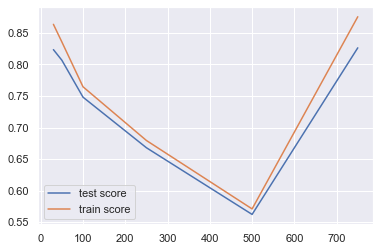

In [197]:
plt.plot(results.param_max_samples.sort_values(ascending=False), results.mean_test_score, label = 'test score')
plt.plot(results.param_max_samples.sort_values(ascending=False), results.mean_train_score, label = 'train score')
plt.legend()
plt.show() 

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.123306      0.062978         0.033249        0.002277   
1       2.359260      0.243677         0.093492        0.041528   
2      15.261364      1.976274         0.148715        0.028505   
3      21.128990      0.439033         0.295903        0.113814   
4      39.721038      1.203477         0.442869        0.063589   
5     117.123187      4.935466         1.746540        0.615217   
6     213.572025     43.014524         2.797368        1.374213   

  param_n_estimators                   params  split0_test_score  \
0                 50     {'n_estimators': 50}           0.827337   
1                100    {'n_estimators': 100}           0.821253   
2                500    {'n_estimators': 500}           0.824051   
3               1000   {'n_estimators': 1000}           0.824043   
4               2000   {'n_estimators': 2000}           0.824489   
5               5000   {'n_estimators': 5000}          

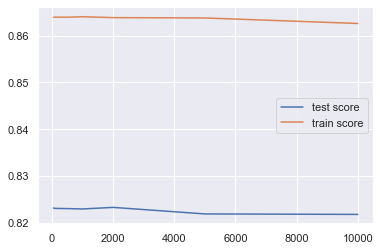

In [203]:
rfr_params = 
              }

rfr_grid = GridSearchCV(estimator = RandomForestRegressor(max_depth = 5, min_samples_split = 5,
                                                         min_samples_leaf = 10,
                                                         max_leaf_nodes = None,
                                                         max_samples= 500), param_grid = rfr_params, cv=5, n_jobs=-1,
                             return_train_score=True)

rfr_grid.fit(x_train, y_train)

results = pd.DataFrame(rfr_grid.cv_results_)
print(results)


plt.plot(results.param_n_estimators.sort_values(ascending=False), results.mean_test_score, label = 'test score')
plt.plot(results.param_n_estimators.sort_values(ascending=False), results.mean_train_score, label = 'train score')
plt.legend()
plt.show() 

In [204]:
rfr_grid.best_params_

{'n_estimators': 500}

In [205]:
rfr = RandomForestRegressor(n_estimators = 500, max_depth = 5, min_samples_split = 5,min_samples_leaf = 10, max_samples = 500,)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.768608      0.523802         0.025701        0.007053   
1       3.304684      0.598764         0.027470        0.005344   
2       2.703682      0.047738         0.021388        0.005341   
3       2.236286      0.225755         0.016741        0.007366   

  param_learning_rate                    params  split0_test_score  \
0               0.001  {'learning_rate': 0.001}           0.108078   
1                0.05   {'learning_rate': 0.05}           0.861512   
2                0.01   {'learning_rate': 0.01}           0.656700   
3                 0.1    {'learning_rate': 0.1}           0.873174   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.128320           0.121634           0.108525           0.131773   
1           0.854892           0.880916           0.881390           0.883015   
2           0.665969           0.650637           0.639183           0

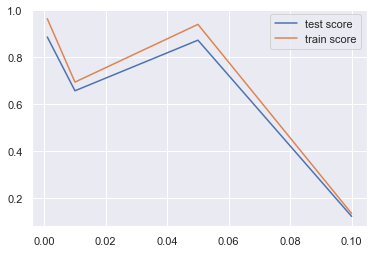

In [207]:
"""'min_samples_split' : [2,5,10,25,50,100],
             'min_samples_leaf': [1,3,5,10,20,50,100],
             'max_features' : ['auto','sqrt','log2'],
             'max_leaf_nodes' : [None,1,2,5,10,50],"""
gbr_params = {'learning_rate' : [0.001, 0.05, 0.01, 0.1],
             }


gbr_grid = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = gbr_params, cv=5, n_jobs=-1,
                             return_train_score=True)

gbr_grid.fit(x_train, y_train)

results = pd.DataFrame(gbr_grid.cv_results_)
print(results)


plt.plot(results.param_learning_rate.sort_values(ascending=False), results.mean_test_score, label = 'test score')
plt.plot(results.param_learning_rate.sort_values(ascending=False), results.mean_train_score, label = 'train score')
plt.legend()
plt.show() 

{'min_samples_split': 25}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.166085      0.377829         0.065382        0.029817   
1       3.685310      0.306020         0.033499        0.005062   
2       2.890183      0.353530         0.024430        0.003982   
3       2.393219      0.109590         0.021379        0.001779   
4       2.194841      0.029445         0.024020        0.002658   
5       1.827662      0.415650         0.019633        0.007516   

  param_min_samples_split                      params  split0_test_score  \
0                       2    {'min_samples_split': 2}           0.873040   
1                       5    {'min_samples_split': 5}           0.872214   
2                      10   {'min_samples_split': 10}           0.873547   
3                      25   {'min_samples_split': 25}           0.878804   
4                      50   {'min_samples_split': 50}           0.877197   
5                     100  {'min_samples_split':

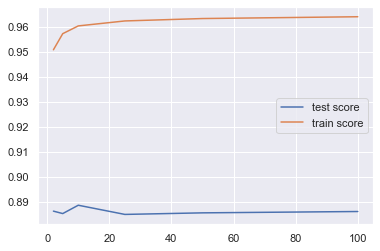

In [212]:
"""'
             'min_samples_leaf': [1,3,5,10,20,50,100],
             'max_features' : ['auto','sqrt','log2'],
             'max_leaf_nodes' : [None,1,2,5,10,50],"""
gbr_params = {'min_samples_split' : [2,5,10,25,50,100]
             }


gbr_grid = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate = 0.1), param_grid = gbr_params, cv=5, n_jobs=-1,
                             return_train_score=True)

gbr_grid.fit(x_train, y_train)
print(gbr_grid.best_params_)

results = pd.DataFrame(gbr_grid.cv_results_)
print(results)


plt.plot(results.param_min_samples_split.sort_values(ascending=False), results.mean_test_score, label = 'test score')
plt.plot(results.param_min_samples_split.sort_values(ascending=False), results.mean_train_score, label = 'train score')
plt.legend()
plt.show() 

{'min_samples_leaf': 5}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.509564      0.147875         0.033025        0.009810   
1       2.590779      0.344136         0.023778        0.004762   
2       2.140919      0.007589         0.018462        0.001833   
3       1.951461      0.095210         0.021800        0.006750   
4       1.905772      0.024438         0.018607        0.000692   
5       1.850865      0.016511         0.018324        0.000855   
6       1.550376      0.122875         0.016250        0.005170   

  param_min_samples_leaf                     params  split0_test_score  \
0                      1    {'min_samples_leaf': 1}           0.878761   
1                      3    {'min_samples_leaf': 3}           0.872901   
2                      5    {'min_samples_leaf': 5}           0.875373   
3                     10   {'min_samples_leaf': 10}           0.875161   
4                     20   {'min_samples_leaf': 20}           0.87030

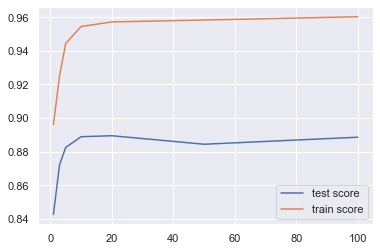

In [213]:
"""'
             'max_features' : ['auto','sqrt','log2'],
             'max_leaf_nodes' : [None,1,2,5,10,50],"""
gbr_params = {'min_samples_leaf': [1,3,5,10,20,50,100]
             }


gbr_grid = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate = 0.1,
                                                             min_samples_split = 25), param_grid = gbr_params, cv=5, n_jobs=-1,
                             return_train_score=True)

gbr_grid.fit(x_train, y_train)
print(gbr_grid.best_params_)

results = pd.DataFrame(gbr_grid.cv_results_)
print(results)


plt.plot(results.param_min_samples_leaf.sort_values(ascending=False), results.mean_test_score, label = 'test score')
plt.plot(results.param_min_samples_leaf.sort_values(ascending=False), results.mean_train_score, label = 'train score')
plt.legend()
plt.show() 

{'max_leaf_nodes': None}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.618196      0.053093         0.029183        0.010661   
1       0.051177      0.021066         0.000000        0.000000   
2       1.813264      0.074500         0.022342        0.002660   
3       2.559773      0.068202         0.031273        0.015378   
4       2.639015      0.232319         0.029151        0.006623   
5       2.555627      0.502238         0.015720        0.003437   

  param_max_leaf_nodes                    params  split0_test_score  \
0                 None  {'max_leaf_nodes': None}           0.875481   
1                    1     {'max_leaf_nodes': 1}                NaN   
2                    2     {'max_leaf_nodes': 2}           0.838825   
3                    5     {'max_leaf_nodes': 5}           0.869300   
4                   10    {'max_leaf_nodes': 10}           0.875373   
5                   50    {'max_leaf_nodes': 50}           0.875373   

   spli

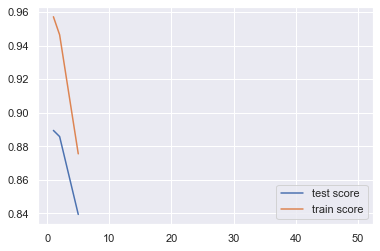

In [214]:
gbr_params = {'max_leaf_nodes' : [None,1,2,5,10,50],
             }


gbr_grid = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate = 0.1,
                                                             min_samples_split = 25,
                                                             min_samples_leaf = 5), param_grid = gbr_params, cv=5, n_jobs=-1,
                             return_train_score=True)

gbr_grid.fit(x_train, y_train)
print(gbr_grid.best_params_)

results = pd.DataFrame(gbr_grid.cv_results_)
print(results)


plt.plot(results.param_max_leaf_nodes.sort_values(ascending=False), results.mean_test_score, label = 'test score')
plt.plot(results.param_max_leaf_nodes.sort_values(ascending=False), results.mean_train_score, label = 'train score')
plt.legend()
plt.show() 

{'n_estimators': 1000}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.022532      0.027131         0.026746        0.005252   
1       1.606511      0.133895         0.022034        0.005465   
2       6.614538      0.051994         0.021171        0.002363   
3      15.387091      0.865083         0.027062        0.009340   
4      32.246926      1.544075         0.025240        0.002818   
5      76.651102      0.605429         0.050880        0.012090   
6     152.963565     25.033417         0.091748        0.036501   

  param_n_estimators                   params  split0_test_score  \
0                 50     {'n_estimators': 50}           0.785391   
1                100    {'n_estimators': 100}           0.838825   
2                500    {'n_estimators': 500}           0.878851   
3               1000   {'n_estimators': 1000}           0.879012   
4               2000   {'n_estimators': 2000}           0.872597   
5               5000   {'n_estim

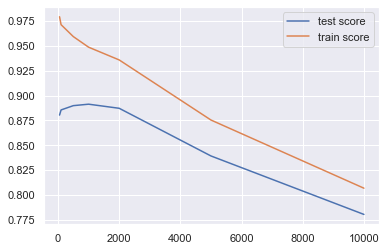

In [215]:
gbr_params = {'n_estimators' : [50, 100, 500, 1000, 2000, 5000, 10000],
             }


gbr_grid = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate = 0.1,
                                                             min_samples_split = 25,
                                                             min_samples_leaf = 5,
                                                             max_leaf_nodes = 2), param_grid = gbr_params, cv=5, n_jobs=-1,
                             return_train_score=True)

gbr_grid.fit(x_train, y_train)
print(gbr_grid.best_params_)

results = pd.DataFrame(gbr_grid.cv_results_)
print(results)


plt.plot(results.param_n_estimators.sort_values(ascending=False), results.mean_test_score, label = 'test score')
plt.plot(results.param_n_estimators.sort_values(ascending=False), results.mean_train_score, label = 'train score')
plt.legend()
plt.show() 

In [216]:
gbr = GradientBoostingRegressor(learning_rate = 0.1,
                                 min_samples_split = 25,
                                 min_samples_leaf = 5,
                                 max_leaf_nodes = 2,
                               n_estimators= 1000)

{'learning_rate': 0.15}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      10.407474      1.085355         0.049449        0.007065   
1      10.271175      0.567389         0.060369        0.022107   
2      10.681331      0.574467         0.046577        0.005212   
3      11.327617      0.545419         0.050639        0.012450   
4      11.733391      0.703918         0.041265        0.003592   
5      11.129695      2.930902         0.034414        0.010562   

  param_learning_rate                   params  split0_test_score  \
0                0.05  {'learning_rate': 0.05}           0.821609   
1                 0.1   {'learning_rate': 0.1}           0.866994   
2                0.15  {'learning_rate': 0.15}           0.884787   
3                 0.2   {'learning_rate': 0.2}           0.868342   
4                0.25  {'learning_rate': 0.25}           0.848461   
5                 0.3   {'learning_rate': 0.3}           0.845895   

   split1_test_score  

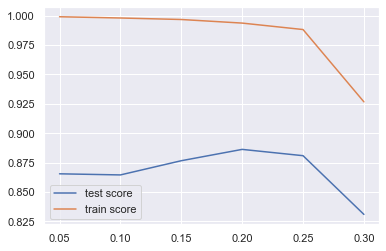

In [220]:
#XGB parameters
xgb_params = {"learning_rate"   : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
             }


xgb_grid = GridSearchCV(estimator = XGBRegressor(), param_grid = xgb_params, cv=5, n_jobs=-1,
                             return_train_score=True)

xgb_grid.fit(x_train, y_train)
print(xgb_grid.best_params_)

results = pd.DataFrame(xgb_grid.cv_results_)
print(results)


plt.plot(results.param_learning_rate.sort_values(ascending=False), results.mean_test_score, label = 'test score')
plt.plot(results.param_learning_rate.sort_values(ascending=False), results.mean_train_score, label = 'train score')
plt.legend()
plt.show() 

In [ ]:
max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
             "min_child_weight" : [ 1, 3, 5, 7 ],
             "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
             "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]



In [221]:
# Define a dictionary with the models 
estimators = [
          ('RFR', RandomForestRegressor(n_estimators = 200,
                            min_samples_split = 10,
                            min_samples_leaf =  3,
                            max_samples = 50,
                            max_features = 'sqrt', 
                            max_leaf_nodes = 2,
                            max_depth = 50, 
                            criterion = 'mae')),
         
          ('GBR' , GradientBoostingRegressor(n_estimators = 10000,
                          min_samples_split = 10,
                               min_samples_leaf = 3,
                               max_leaf_nodes = 10,
                               max_features = 'sqrt',
                               loss=  'lad',
                               learning_rate = 0.05,
                               criterion= 'friedman_mse')),
          ('Ridge' , Ridge(alpha=10)),
          ('Cat', CatBoostRegressor(iterations= 1000,
                        learning_rate=0.1, 
                        l2_leaf_reg = 10,  
                        depth = 3, 
                        border_count = 20))]
sr = StackingRegressor(estimators= estimators, final_estimator = LinearRegression())
sr.fit(x_train, y_train)
y_pred = sr.predict(x_test)
print('mean squared error : ', mean_squared_error(y_test,y_pred))
print('root mse : ', mean_squared_error(y_test,y_pred,squared=False))
print('r2 scores : ', r2_score(y_test,y_pred))


model_accuracy = model_accuracy.append({'Model': 'hyper_stacked', 'RMSE':mean_squared_error(y_test,y_pred,squared=False),
                      'MAE' : mean_absolute_error(y_test,y_pred), 'MSE': mean_squared_error(y_test,y_pred),
                      'R2': r2_score(y_test,y_pred)}, ignore_index=True)

0:	learn: 0.3729857	total: 22.2ms	remaining: 22.2s
1:	learn: 0.3547777	total: 28.9ms	remaining: 14.4s
2:	learn: 0.3378880	total: 45.4ms	remaining: 15.1s
3:	learn: 0.3230887	total: 53ms	remaining: 13.2s
4:	learn: 0.3093946	total: 56.9ms	remaining: 11.3s
5:	learn: 0.2955870	total: 61.4ms	remaining: 10.2s
6:	learn: 0.2846599	total: 64.7ms	remaining: 9.17s
7:	learn: 0.2744382	total: 70.5ms	remaining: 8.74s
8:	learn: 0.2647331	total: 73.3ms	remaining: 8.07s
9:	learn: 0.2547397	total: 81.1ms	remaining: 8.03s
10:	learn: 0.2455455	total: 85.1ms	remaining: 7.65s
11:	learn: 0.2383741	total: 88.3ms	remaining: 7.27s
12:	learn: 0.2317848	total: 91ms	remaining: 6.91s
13:	learn: 0.2241872	total: 94.9ms	remaining: 6.68s
14:	learn: 0.2179383	total: 99ms	remaining: 6.5s
15:	learn: 0.2133967	total: 104ms	remaining: 6.38s
16:	learn: 0.2074347	total: 108ms	remaining: 6.24s
17:	learn: 0.2027157	total: 113ms	remaining: 6.19s
18:	learn: 0.1976690	total: 121ms	remaining: 6.24s
19:	learn: 0.1940331	total: 129ms

174:	learn: 0.1066609	total: 993ms	remaining: 4.68s
175:	learn: 0.1066143	total: 997ms	remaining: 4.67s
176:	learn: 0.1064937	total: 1s	remaining: 4.65s
177:	learn: 0.1064491	total: 1s	remaining: 4.64s
178:	learn: 0.1063958	total: 1.01s	remaining: 4.63s
179:	learn: 0.1063776	total: 1.01s	remaining: 4.63s
180:	learn: 0.1061769	total: 1.02s	remaining: 4.62s
181:	learn: 0.1060423	total: 1.02s	remaining: 4.61s
182:	learn: 0.1058088	total: 1.03s	remaining: 4.6s
183:	learn: 0.1054858	total: 1.04s	remaining: 4.6s
184:	learn: 0.1052706	total: 1.04s	remaining: 4.6s
185:	learn: 0.1052277	total: 1.05s	remaining: 4.58s
186:	learn: 0.1049904	total: 1.05s	remaining: 4.58s
187:	learn: 0.1048256	total: 1.06s	remaining: 4.57s
188:	learn: 0.1047356	total: 1.06s	remaining: 4.56s
189:	learn: 0.1046948	total: 1.07s	remaining: 4.56s
190:	learn: 0.1044928	total: 1.07s	remaining: 4.55s
191:	learn: 0.1044535	total: 1.08s	remaining: 4.55s
192:	learn: 0.1044136	total: 1.09s	remaining: 4.55s
193:	learn: 0.1043764

344:	learn: 0.0935480	total: 1.75s	remaining: 3.33s
345:	learn: 0.0934867	total: 1.76s	remaining: 3.33s
346:	learn: 0.0934483	total: 1.76s	remaining: 3.32s
347:	learn: 0.0932810	total: 1.77s	remaining: 3.32s
348:	learn: 0.0931558	total: 1.78s	remaining: 3.31s
349:	learn: 0.0930590	total: 1.78s	remaining: 3.31s
350:	learn: 0.0929853	total: 1.79s	remaining: 3.31s
351:	learn: 0.0929747	total: 1.8s	remaining: 3.31s
352:	learn: 0.0929134	total: 1.8s	remaining: 3.31s
353:	learn: 0.0927213	total: 1.81s	remaining: 3.3s
354:	learn: 0.0927035	total: 1.81s	remaining: 3.3s
355:	learn: 0.0926522	total: 1.82s	remaining: 3.29s
356:	learn: 0.0926416	total: 1.83s	remaining: 3.29s
357:	learn: 0.0924420	total: 1.83s	remaining: 3.29s
358:	learn: 0.0923544	total: 1.84s	remaining: 3.28s
359:	learn: 0.0923436	total: 1.84s	remaining: 3.28s
360:	learn: 0.0921882	total: 1.85s	remaining: 3.27s
361:	learn: 0.0921399	total: 1.94s	remaining: 3.42s
362:	learn: 0.0921300	total: 1.94s	remaining: 3.41s
363:	learn: 0.09

535:	learn: 0.0837531	total: 2.88s	remaining: 2.5s
536:	learn: 0.0837379	total: 2.89s	remaining: 2.49s
537:	learn: 0.0837158	total: 2.89s	remaining: 2.48s
538:	learn: 0.0836057	total: 2.9s	remaining: 2.48s
539:	learn: 0.0835912	total: 2.9s	remaining: 2.47s
540:	learn: 0.0835134	total: 2.91s	remaining: 2.47s
541:	learn: 0.0834696	total: 2.91s	remaining: 2.46s
542:	learn: 0.0833081	total: 2.91s	remaining: 2.45s
543:	learn: 0.0832917	total: 2.92s	remaining: 2.45s
544:	learn: 0.0831855	total: 2.92s	remaining: 2.44s
545:	learn: 0.0830864	total: 2.92s	remaining: 2.43s
546:	learn: 0.0830649	total: 2.93s	remaining: 2.42s
547:	learn: 0.0829798	total: 2.93s	remaining: 2.42s
548:	learn: 0.0828619	total: 2.94s	remaining: 2.41s
549:	learn: 0.0828457	total: 2.94s	remaining: 2.41s
550:	learn: 0.0827643	total: 2.95s	remaining: 2.4s
551:	learn: 0.0827357	total: 2.95s	remaining: 2.4s
552:	learn: 0.0827052	total: 2.96s	remaining: 2.39s
553:	learn: 0.0826092	total: 2.96s	remaining: 2.39s
554:	learn: 0.082

728:	learn: 0.0753361	total: 3.63s	remaining: 1.35s
729:	learn: 0.0752583	total: 3.63s	remaining: 1.34s
730:	learn: 0.0752479	total: 3.63s	remaining: 1.34s
731:	learn: 0.0752409	total: 3.64s	remaining: 1.33s
732:	learn: 0.0752291	total: 3.64s	remaining: 1.33s
733:	learn: 0.0752176	total: 3.65s	remaining: 1.32s
734:	learn: 0.0751608	total: 3.65s	remaining: 1.32s
735:	learn: 0.0751304	total: 3.66s	remaining: 1.31s
736:	learn: 0.0751236	total: 3.66s	remaining: 1.31s
737:	learn: 0.0751064	total: 3.67s	remaining: 1.3s
738:	learn: 0.0750441	total: 3.67s	remaining: 1.3s
739:	learn: 0.0750329	total: 3.68s	remaining: 1.29s
740:	learn: 0.0750291	total: 3.68s	remaining: 1.29s
741:	learn: 0.0749520	total: 3.68s	remaining: 1.28s
742:	learn: 0.0749115	total: 3.69s	remaining: 1.27s
743:	learn: 0.0748916	total: 3.69s	remaining: 1.27s
744:	learn: 0.0748566	total: 3.7s	remaining: 1.26s
745:	learn: 0.0748482	total: 3.7s	remaining: 1.26s
746:	learn: 0.0747750	total: 3.7s	remaining: 1.25s
747:	learn: 0.074

900:	learn: 0.0695241	total: 4.38s	remaining: 482ms
901:	learn: 0.0694822	total: 4.39s	remaining: 477ms
902:	learn: 0.0694135	total: 4.39s	remaining: 472ms
903:	learn: 0.0693792	total: 4.4s	remaining: 467ms
904:	learn: 0.0693674	total: 4.41s	remaining: 463ms
905:	learn: 0.0693625	total: 4.42s	remaining: 458ms
906:	learn: 0.0693106	total: 4.42s	remaining: 453ms
907:	learn: 0.0692789	total: 4.43s	remaining: 449ms
908:	learn: 0.0692749	total: 4.52s	remaining: 452ms
909:	learn: 0.0692362	total: 4.53s	remaining: 448ms
910:	learn: 0.0691643	total: 4.54s	remaining: 443ms
911:	learn: 0.0690813	total: 4.54s	remaining: 439ms
912:	learn: 0.0690287	total: 4.56s	remaining: 435ms
913:	learn: 0.0690211	total: 4.59s	remaining: 432ms
914:	learn: 0.0689642	total: 4.59s	remaining: 427ms
915:	learn: 0.0689557	total: 4.59s	remaining: 421ms
916:	learn: 0.0688723	total: 4.6s	remaining: 416ms
917:	learn: 0.0688683	total: 4.6s	remaining: 411ms
918:	learn: 0.0688638	total: 4.61s	remaining: 406ms
919:	learn: 0.0

68:	learn: 0.1294022	total: 404ms	remaining: 5.45s
69:	learn: 0.1291880	total: 407ms	remaining: 5.41s
70:	learn: 0.1284108	total: 410ms	remaining: 5.37s
71:	learn: 0.1276863	total: 413ms	remaining: 5.33s
72:	learn: 0.1274249	total: 417ms	remaining: 5.29s
73:	learn: 0.1272479	total: 419ms	remaining: 5.25s
74:	learn: 0.1266545	total: 422ms	remaining: 5.2s
75:	learn: 0.1261479	total: 425ms	remaining: 5.17s
76:	learn: 0.1255917	total: 428ms	remaining: 5.13s
77:	learn: 0.1249570	total: 431ms	remaining: 5.09s
78:	learn: 0.1247433	total: 433ms	remaining: 5.05s
79:	learn: 0.1242541	total: 436ms	remaining: 5.01s
80:	learn: 0.1240548	total: 440ms	remaining: 4.99s
81:	learn: 0.1236520	total: 444ms	remaining: 4.97s
82:	learn: 0.1230924	total: 447ms	remaining: 4.94s
83:	learn: 0.1229211	total: 450ms	remaining: 4.91s
84:	learn: 0.1226835	total: 452ms	remaining: 4.87s
85:	learn: 0.1225083	total: 456ms	remaining: 4.84s
86:	learn: 0.1218854	total: 459ms	remaining: 4.82s
87:	learn: 0.1212481	total: 462m

268:	learn: 0.0946742	total: 1.15s	remaining: 3.12s
269:	learn: 0.0945943	total: 1.15s	remaining: 3.12s
270:	learn: 0.0945667	total: 1.16s	remaining: 3.12s
271:	learn: 0.0944312	total: 1.16s	remaining: 3.12s
272:	learn: 0.0943932	total: 1.17s	remaining: 3.11s
273:	learn: 0.0943020	total: 1.17s	remaining: 3.11s
274:	learn: 0.0942632	total: 1.18s	remaining: 3.1s
275:	learn: 0.0941445	total: 1.18s	remaining: 3.1s
276:	learn: 0.0940875	total: 1.19s	remaining: 3.09s
277:	learn: 0.0939321	total: 1.19s	remaining: 3.09s
278:	learn: 0.0936430	total: 1.19s	remaining: 3.08s
279:	learn: 0.0936137	total: 1.2s	remaining: 3.08s
280:	learn: 0.0934643	total: 1.21s	remaining: 3.08s
281:	learn: 0.0934324	total: 1.21s	remaining: 3.09s
282:	learn: 0.0933999	total: 1.22s	remaining: 3.08s
283:	learn: 0.0933320	total: 1.22s	remaining: 3.08s
284:	learn: 0.0933006	total: 1.22s	remaining: 3.07s
285:	learn: 0.0932425	total: 1.23s	remaining: 3.06s
286:	learn: 0.0932048	total: 1.23s	remaining: 3.06s
287:	learn: 0.0

431:	learn: 0.0825236	total: 1.7s	remaining: 2.23s
432:	learn: 0.0824276	total: 1.7s	remaining: 2.23s
433:	learn: 0.0823559	total: 1.71s	remaining: 2.23s
434:	learn: 0.0822573	total: 1.71s	remaining: 2.22s
435:	learn: 0.0822179	total: 1.71s	remaining: 2.22s
436:	learn: 0.0820631	total: 1.72s	remaining: 2.21s
437:	learn: 0.0820461	total: 1.72s	remaining: 2.21s
438:	learn: 0.0819875	total: 1.72s	remaining: 2.2s
439:	learn: 0.0819494	total: 1.73s	remaining: 2.19s
440:	learn: 0.0819192	total: 1.73s	remaining: 2.19s
441:	learn: 0.0818065	total: 1.73s	remaining: 2.19s
442:	learn: 0.0817875	total: 1.73s	remaining: 2.18s
443:	learn: 0.0817609	total: 1.74s	remaining: 2.17s
444:	learn: 0.0816965	total: 1.74s	remaining: 2.17s
445:	learn: 0.0816733	total: 1.74s	remaining: 2.16s
446:	learn: 0.0816399	total: 1.75s	remaining: 2.16s
447:	learn: 0.0816254	total: 1.75s	remaining: 2.15s
448:	learn: 0.0815827	total: 1.75s	remaining: 2.15s
449:	learn: 0.0815154	total: 1.75s	remaining: 2.15s
450:	learn: 0.0

625:	learn: 0.0727360	total: 2.44s	remaining: 1.46s
626:	learn: 0.0727168	total: 2.45s	remaining: 1.46s
627:	learn: 0.0726869	total: 2.45s	remaining: 1.45s
628:	learn: 0.0726673	total: 2.46s	remaining: 1.45s
629:	learn: 0.0726458	total: 2.46s	remaining: 1.45s
630:	learn: 0.0726157	total: 2.47s	remaining: 1.44s
631:	learn: 0.0725596	total: 2.47s	remaining: 1.44s
632:	learn: 0.0724497	total: 2.48s	remaining: 1.44s
633:	learn: 0.0724096	total: 2.48s	remaining: 1.43s
634:	learn: 0.0723927	total: 2.48s	remaining: 1.43s
635:	learn: 0.0723511	total: 2.49s	remaining: 1.42s
636:	learn: 0.0723261	total: 2.49s	remaining: 1.42s
637:	learn: 0.0722583	total: 2.49s	remaining: 1.42s
638:	learn: 0.0722354	total: 2.5s	remaining: 1.41s
639:	learn: 0.0720387	total: 2.5s	remaining: 1.41s
640:	learn: 0.0720135	total: 2.5s	remaining: 1.4s
641:	learn: 0.0719952	total: 2.51s	remaining: 1.4s
642:	learn: 0.0719742	total: 2.51s	remaining: 1.39s
643:	learn: 0.0719242	total: 2.51s	remaining: 1.39s
644:	learn: 0.071

804:	learn: 0.0653792	total: 3.01s	remaining: 729ms
805:	learn: 0.0653092	total: 3.02s	remaining: 726ms
806:	learn: 0.0652819	total: 3.02s	remaining: 722ms
807:	learn: 0.0652249	total: 3.02s	remaining: 719ms
808:	learn: 0.0651832	total: 3.03s	remaining: 715ms
809:	learn: 0.0651729	total: 3.03s	remaining: 711ms
810:	learn: 0.0651505	total: 3.04s	remaining: 707ms
811:	learn: 0.0650761	total: 3.04s	remaining: 703ms
812:	learn: 0.0650594	total: 3.04s	remaining: 700ms
813:	learn: 0.0649436	total: 3.04s	remaining: 696ms
814:	learn: 0.0648417	total: 3.05s	remaining: 692ms
815:	learn: 0.0647821	total: 3.05s	remaining: 688ms
816:	learn: 0.0646903	total: 3.05s	remaining: 684ms
817:	learn: 0.0646714	total: 3.06s	remaining: 680ms
818:	learn: 0.0646440	total: 3.06s	remaining: 676ms
819:	learn: 0.0646165	total: 3.06s	remaining: 672ms
820:	learn: 0.0646112	total: 3.07s	remaining: 669ms
821:	learn: 0.0645990	total: 3.07s	remaining: 665ms
822:	learn: 0.0645849	total: 3.07s	remaining: 661ms
823:	learn: 

975:	learn: 0.0599512	total: 3.57s	remaining: 87.9ms
976:	learn: 0.0599457	total: 3.58s	remaining: 84.2ms
977:	learn: 0.0599237	total: 3.58s	remaining: 80.5ms
978:	learn: 0.0599153	total: 3.58s	remaining: 76.9ms
979:	learn: 0.0599054	total: 3.59s	remaining: 73.2ms
980:	learn: 0.0598671	total: 3.59s	remaining: 69.5ms
981:	learn: 0.0597672	total: 3.6s	remaining: 66ms
982:	learn: 0.0597588	total: 3.6s	remaining: 62.3ms
983:	learn: 0.0597484	total: 3.61s	remaining: 58.7ms
984:	learn: 0.0597348	total: 3.61s	remaining: 55ms
985:	learn: 0.0597156	total: 3.61s	remaining: 51.3ms
986:	learn: 0.0596380	total: 3.62s	remaining: 47.6ms
987:	learn: 0.0596227	total: 3.62s	remaining: 44ms
988:	learn: 0.0595878	total: 3.62s	remaining: 40.3ms
989:	learn: 0.0595810	total: 3.63s	remaining: 36.6ms
990:	learn: 0.0595390	total: 3.63s	remaining: 33ms
991:	learn: 0.0595144	total: 3.63s	remaining: 29.3ms
992:	learn: 0.0595015	total: 3.64s	remaining: 25.6ms
993:	learn: 0.0594224	total: 3.64s	remaining: 22ms
994:	

135:	learn: 0.1067229	total: 372ms	remaining: 2.37s
136:	learn: 0.1066520	total: 376ms	remaining: 2.37s
137:	learn: 0.1064322	total: 379ms	remaining: 2.37s
138:	learn: 0.1063209	total: 382ms	remaining: 2.36s
139:	learn: 0.1061180	total: 384ms	remaining: 2.36s
140:	learn: 0.1058838	total: 389ms	remaining: 2.37s
141:	learn: 0.1054944	total: 391ms	remaining: 2.36s
142:	learn: 0.1053650	total: 394ms	remaining: 2.36s
143:	learn: 0.1052067	total: 397ms	remaining: 2.36s
144:	learn: 0.1050522	total: 402ms	remaining: 2.37s
145:	learn: 0.1048363	total: 406ms	remaining: 2.38s
146:	learn: 0.1044292	total: 409ms	remaining: 2.37s
147:	learn: 0.1041786	total: 412ms	remaining: 2.37s
148:	learn: 0.1039000	total: 415ms	remaining: 2.37s
149:	learn: 0.1035959	total: 417ms	remaining: 2.36s
150:	learn: 0.1033845	total: 420ms	remaining: 2.36s
151:	learn: 0.1032411	total: 422ms	remaining: 2.35s
152:	learn: 0.1028641	total: 426ms	remaining: 2.36s
153:	learn: 0.1028046	total: 428ms	remaining: 2.35s
154:	learn: 

319:	learn: 0.0865092	total: 934ms	remaining: 1.98s
320:	learn: 0.0864769	total: 937ms	remaining: 1.98s
321:	learn: 0.0864305	total: 940ms	remaining: 1.98s
322:	learn: 0.0863175	total: 943ms	remaining: 1.98s
323:	learn: 0.0861379	total: 945ms	remaining: 1.97s
324:	learn: 0.0858977	total: 948ms	remaining: 1.97s
325:	learn: 0.0858056	total: 951ms	remaining: 1.97s
326:	learn: 0.0856831	total: 954ms	remaining: 1.96s
327:	learn: 0.0855944	total: 957ms	remaining: 1.96s
328:	learn: 0.0855538	total: 961ms	remaining: 1.96s
329:	learn: 0.0854321	total: 963ms	remaining: 1.96s
330:	learn: 0.0853971	total: 966ms	remaining: 1.95s
331:	learn: 0.0853054	total: 969ms	remaining: 1.95s
332:	learn: 0.0852368	total: 971ms	remaining: 1.94s
333:	learn: 0.0851965	total: 973ms	remaining: 1.94s
334:	learn: 0.0851709	total: 976ms	remaining: 1.94s
335:	learn: 0.0851316	total: 978ms	remaining: 1.93s
336:	learn: 0.0849333	total: 981ms	remaining: 1.93s
337:	learn: 0.0848112	total: 983ms	remaining: 1.93s
338:	learn: 

510:	learn: 0.0746922	total: 1.48s	remaining: 1.42s
511:	learn: 0.0745264	total: 1.48s	remaining: 1.41s
512:	learn: 0.0744850	total: 1.49s	remaining: 1.41s
513:	learn: 0.0743843	total: 1.49s	remaining: 1.41s
514:	learn: 0.0743444	total: 1.49s	remaining: 1.4s
515:	learn: 0.0742744	total: 1.49s	remaining: 1.4s
516:	learn: 0.0742003	total: 1.5s	remaining: 1.4s
517:	learn: 0.0741038	total: 1.5s	remaining: 1.39s
518:	learn: 0.0740896	total: 1.5s	remaining: 1.39s
519:	learn: 0.0740802	total: 1.5s	remaining: 1.39s
520:	learn: 0.0740238	total: 1.51s	remaining: 1.39s
521:	learn: 0.0739036	total: 1.51s	remaining: 1.38s
522:	learn: 0.0738703	total: 1.51s	remaining: 1.38s
523:	learn: 0.0738158	total: 1.51s	remaining: 1.38s
524:	learn: 0.0737512	total: 1.52s	remaining: 1.37s
525:	learn: 0.0736600	total: 1.52s	remaining: 1.37s
526:	learn: 0.0736400	total: 1.52s	remaining: 1.37s
527:	learn: 0.0735231	total: 1.52s	remaining: 1.36s
528:	learn: 0.0734517	total: 1.53s	remaining: 1.36s
529:	learn: 0.07340

696:	learn: 0.0667760	total: 2.04s	remaining: 887ms
697:	learn: 0.0666995	total: 2.04s	remaining: 884ms
698:	learn: 0.0666889	total: 2.05s	remaining: 881ms
699:	learn: 0.0666484	total: 2.05s	remaining: 878ms
700:	learn: 0.0666309	total: 2.05s	remaining: 875ms
701:	learn: 0.0665978	total: 2.05s	remaining: 872ms
702:	learn: 0.0665018	total: 2.06s	remaining: 870ms
703:	learn: 0.0664905	total: 2.06s	remaining: 867ms
704:	learn: 0.0664844	total: 2.07s	remaining: 865ms
705:	learn: 0.0664142	total: 2.07s	remaining: 862ms
706:	learn: 0.0663272	total: 2.08s	remaining: 860ms
707:	learn: 0.0662865	total: 2.08s	remaining: 858ms
708:	learn: 0.0662577	total: 2.09s	remaining: 857ms
709:	learn: 0.0662246	total: 2.09s	remaining: 854ms
710:	learn: 0.0662076	total: 2.09s	remaining: 851ms
711:	learn: 0.0661875	total: 2.1s	remaining: 849ms
712:	learn: 0.0661708	total: 2.1s	remaining: 846ms
713:	learn: 0.0661623	total: 2.1s	remaining: 844ms
714:	learn: 0.0661520	total: 2.11s	remaining: 841ms
715:	learn: 0.0

877:	learn: 0.0596166	total: 2.6s	remaining: 361ms
878:	learn: 0.0595910	total: 2.6s	remaining: 358ms
879:	learn: 0.0595426	total: 2.61s	remaining: 355ms
880:	learn: 0.0595194	total: 2.61s	remaining: 353ms
881:	learn: 0.0595091	total: 2.61s	remaining: 350ms
882:	learn: 0.0595003	total: 2.62s	remaining: 347ms
883:	learn: 0.0594601	total: 2.62s	remaining: 344ms
884:	learn: 0.0593996	total: 2.62s	remaining: 341ms
885:	learn: 0.0593853	total: 2.63s	remaining: 338ms
886:	learn: 0.0593681	total: 2.63s	remaining: 335ms
887:	learn: 0.0593462	total: 2.63s	remaining: 332ms
888:	learn: 0.0593252	total: 2.63s	remaining: 329ms
889:	learn: 0.0593163	total: 2.64s	remaining: 326ms
890:	learn: 0.0593094	total: 2.64s	remaining: 323ms
891:	learn: 0.0592486	total: 2.64s	remaining: 320ms
892:	learn: 0.0592402	total: 2.64s	remaining: 317ms
893:	learn: 0.0592326	total: 2.65s	remaining: 314ms
894:	learn: 0.0592148	total: 2.65s	remaining: 311ms
895:	learn: 0.0592088	total: 2.65s	remaining: 308ms
896:	learn: 0.

49:	learn: 0.1453053	total: 191ms	remaining: 3.62s
50:	learn: 0.1445088	total: 194ms	remaining: 3.61s
51:	learn: 0.1440251	total: 197ms	remaining: 3.59s
52:	learn: 0.1429279	total: 201ms	remaining: 3.59s
53:	learn: 0.1421445	total: 206ms	remaining: 3.61s
54:	learn: 0.1415406	total: 213ms	remaining: 3.65s
55:	learn: 0.1405335	total: 216ms	remaining: 3.64s
56:	learn: 0.1398417	total: 220ms	remaining: 3.64s
57:	learn: 0.1394957	total: 223ms	remaining: 3.63s
58:	learn: 0.1389494	total: 226ms	remaining: 3.61s
59:	learn: 0.1380589	total: 230ms	remaining: 3.61s
60:	learn: 0.1374691	total: 233ms	remaining: 3.59s
61:	learn: 0.1370251	total: 237ms	remaining: 3.59s
62:	learn: 0.1364648	total: 242ms	remaining: 3.59s
63:	learn: 0.1358767	total: 245ms	remaining: 3.58s
64:	learn: 0.1349987	total: 252ms	remaining: 3.63s
65:	learn: 0.1342373	total: 256ms	remaining: 3.62s
66:	learn: 0.1336590	total: 259ms	remaining: 3.61s
67:	learn: 0.1329058	total: 262ms	remaining: 3.59s
68:	learn: 0.1323553	total: 265

258:	learn: 0.0995455	total: 943ms	remaining: 2.7s
259:	learn: 0.0993639	total: 946ms	remaining: 2.69s
260:	learn: 0.0993471	total: 949ms	remaining: 2.69s
261:	learn: 0.0991467	total: 951ms	remaining: 2.68s
262:	learn: 0.0990202	total: 954ms	remaining: 2.67s
263:	learn: 0.0990038	total: 957ms	remaining: 2.67s
264:	learn: 0.0989476	total: 962ms	remaining: 2.67s
265:	learn: 0.0988823	total: 967ms	remaining: 2.67s
266:	learn: 0.0986642	total: 971ms	remaining: 2.67s
267:	learn: 0.0986247	total: 974ms	remaining: 2.66s
268:	learn: 0.0984351	total: 979ms	remaining: 2.66s
269:	learn: 0.0983113	total: 982ms	remaining: 2.65s
270:	learn: 0.0980321	total: 985ms	remaining: 2.65s
271:	learn: 0.0979121	total: 987ms	remaining: 2.64s
272:	learn: 0.0978962	total: 991ms	remaining: 2.64s
273:	learn: 0.0977573	total: 994ms	remaining: 2.63s
274:	learn: 0.0977100	total: 997ms	remaining: 2.63s
275:	learn: 0.0975065	total: 999ms	remaining: 2.62s
276:	learn: 0.0973431	total: 1s	remaining: 2.61s
277:	learn: 0.09

434:	learn: 0.0857671	total: 1.49s	remaining: 1.94s
435:	learn: 0.0857406	total: 1.5s	remaining: 1.93s
436:	learn: 0.0857030	total: 1.5s	remaining: 1.93s
437:	learn: 0.0856839	total: 1.5s	remaining: 1.93s
438:	learn: 0.0856416	total: 1.5s	remaining: 1.92s
439:	learn: 0.0855048	total: 1.51s	remaining: 1.92s
440:	learn: 0.0854692	total: 1.51s	remaining: 1.91s
441:	learn: 0.0854300	total: 1.51s	remaining: 1.91s
442:	learn: 0.0854007	total: 1.51s	remaining: 1.9s
443:	learn: 0.0853703	total: 1.52s	remaining: 1.9s
444:	learn: 0.0852963	total: 1.52s	remaining: 1.9s
445:	learn: 0.0852840	total: 1.52s	remaining: 1.89s
446:	learn: 0.0851665	total: 1.53s	remaining: 1.89s
447:	learn: 0.0851437	total: 1.53s	remaining: 1.88s
448:	learn: 0.0850703	total: 1.53s	remaining: 1.88s
449:	learn: 0.0849758	total: 1.53s	remaining: 1.88s
450:	learn: 0.0849642	total: 1.54s	remaining: 1.87s
451:	learn: 0.0849516	total: 1.54s	remaining: 1.87s
452:	learn: 0.0849381	total: 1.54s	remaining: 1.86s
453:	learn: 0.08486

598:	learn: 0.0782272	total: 2.05s	remaining: 1.38s
599:	learn: 0.0781840	total: 2.06s	remaining: 1.37s
600:	learn: 0.0781045	total: 2.06s	remaining: 1.37s
601:	learn: 0.0780670	total: 2.06s	remaining: 1.36s
602:	learn: 0.0780566	total: 2.07s	remaining: 1.36s
603:	learn: 0.0780472	total: 2.07s	remaining: 1.36s
604:	learn: 0.0779823	total: 2.07s	remaining: 1.35s
605:	learn: 0.0779034	total: 2.08s	remaining: 1.35s
606:	learn: 0.0778917	total: 2.08s	remaining: 1.35s
607:	learn: 0.0778296	total: 2.08s	remaining: 1.34s
608:	learn: 0.0777590	total: 2.08s	remaining: 1.34s
609:	learn: 0.0777515	total: 2.09s	remaining: 1.33s
610:	learn: 0.0777320	total: 2.09s	remaining: 1.33s
611:	learn: 0.0777054	total: 2.1s	remaining: 1.33s
612:	learn: 0.0776822	total: 2.1s	remaining: 1.32s
613:	learn: 0.0776393	total: 2.1s	remaining: 1.32s
614:	learn: 0.0776321	total: 2.11s	remaining: 1.32s
615:	learn: 0.0776209	total: 2.11s	remaining: 1.32s
616:	learn: 0.0775768	total: 2.12s	remaining: 1.31s
617:	learn: 0.0

784:	learn: 0.0708909	total: 2.61s	remaining: 714ms
785:	learn: 0.0708436	total: 2.61s	remaining: 711ms
786:	learn: 0.0708280	total: 2.61s	remaining: 707ms
787:	learn: 0.0708060	total: 2.61s	remaining: 703ms
788:	learn: 0.0707716	total: 2.62s	remaining: 700ms
789:	learn: 0.0707665	total: 2.62s	remaining: 697ms
790:	learn: 0.0707484	total: 2.62s	remaining: 693ms
791:	learn: 0.0707423	total: 2.63s	remaining: 689ms
792:	learn: 0.0707148	total: 2.63s	remaining: 686ms
793:	learn: 0.0707045	total: 2.63s	remaining: 683ms
794:	learn: 0.0706694	total: 2.63s	remaining: 679ms
795:	learn: 0.0706214	total: 2.64s	remaining: 676ms
796:	learn: 0.0705205	total: 2.64s	remaining: 672ms
797:	learn: 0.0705097	total: 2.64s	remaining: 669ms
798:	learn: 0.0705038	total: 2.64s	remaining: 665ms
799:	learn: 0.0704937	total: 2.65s	remaining: 662ms
800:	learn: 0.0704675	total: 2.65s	remaining: 658ms
801:	learn: 0.0704257	total: 2.65s	remaining: 655ms
802:	learn: 0.0704189	total: 2.65s	remaining: 651ms
803:	learn: 

977:	learn: 0.0639483	total: 3.16s	remaining: 71.1ms
978:	learn: 0.0639436	total: 3.17s	remaining: 67.9ms
979:	learn: 0.0639360	total: 3.17s	remaining: 64.7ms
980:	learn: 0.0638923	total: 3.17s	remaining: 61.4ms
981:	learn: 0.0638583	total: 3.17s	remaining: 58.2ms
982:	learn: 0.0638521	total: 3.18s	remaining: 54.9ms
983:	learn: 0.0638342	total: 3.18s	remaining: 51.7ms
984:	learn: 0.0638116	total: 3.18s	remaining: 48.5ms
985:	learn: 0.0637906	total: 3.18s	remaining: 45.2ms
986:	learn: 0.0637565	total: 3.19s	remaining: 42ms
987:	learn: 0.0637124	total: 3.19s	remaining: 38.7ms
988:	learn: 0.0636922	total: 3.19s	remaining: 35.5ms
989:	learn: 0.0636875	total: 3.19s	remaining: 32.3ms
990:	learn: 0.0636389	total: 3.2s	remaining: 29ms
991:	learn: 0.0635976	total: 3.2s	remaining: 25.8ms
992:	learn: 0.0635924	total: 3.2s	remaining: 22.6ms
993:	learn: 0.0635277	total: 3.21s	remaining: 19.3ms
994:	learn: 0.0635099	total: 3.21s	remaining: 16.1ms
995:	learn: 0.0634718	total: 3.21s	remaining: 12.9ms


158:	learn: 0.1098317	total: 570ms	remaining: 3.02s
159:	learn: 0.1097402	total: 576ms	remaining: 3.02s
160:	learn: 0.1095438	total: 581ms	remaining: 3.03s
161:	learn: 0.1092461	total: 585ms	remaining: 3.02s
162:	learn: 0.1091603	total: 588ms	remaining: 3.02s
163:	learn: 0.1090127	total: 592ms	remaining: 3.02s
164:	learn: 0.1088713	total: 595ms	remaining: 3.01s
165:	learn: 0.1087764	total: 598ms	remaining: 3s
166:	learn: 0.1086904	total: 600ms	remaining: 2.99s
167:	learn: 0.1085979	total: 603ms	remaining: 2.99s
168:	learn: 0.1085148	total: 606ms	remaining: 2.98s
169:	learn: 0.1083799	total: 608ms	remaining: 2.97s
170:	learn: 0.1083240	total: 611ms	remaining: 2.96s
171:	learn: 0.1081913	total: 614ms	remaining: 2.96s
172:	learn: 0.1079225	total: 617ms	remaining: 2.95s
173:	learn: 0.1076947	total: 620ms	remaining: 2.94s
174:	learn: 0.1073927	total: 623ms	remaining: 2.94s
175:	learn: 0.1071788	total: 626ms	remaining: 2.93s
176:	learn: 0.1069119	total: 629ms	remaining: 2.92s
177:	learn: 0.1

317:	learn: 0.0921137	total: 1.14s	remaining: 2.45s
318:	learn: 0.0919962	total: 1.14s	remaining: 2.44s
319:	learn: 0.0919314	total: 1.15s	remaining: 2.44s
320:	learn: 0.0917852	total: 1.15s	remaining: 2.43s
321:	learn: 0.0917450	total: 1.16s	remaining: 2.43s
322:	learn: 0.0916784	total: 1.16s	remaining: 2.43s
323:	learn: 0.0916324	total: 1.16s	remaining: 2.42s
324:	learn: 0.0916000	total: 1.17s	remaining: 2.42s
325:	learn: 0.0915017	total: 1.17s	remaining: 2.42s
326:	learn: 0.0913742	total: 1.17s	remaining: 2.41s
327:	learn: 0.0913290	total: 1.18s	remaining: 2.41s
328:	learn: 0.0911792	total: 1.18s	remaining: 2.41s
329:	learn: 0.0910872	total: 1.19s	remaining: 2.42s
330:	learn: 0.0909810	total: 1.2s	remaining: 2.42s
331:	learn: 0.0908888	total: 1.2s	remaining: 2.42s
332:	learn: 0.0906837	total: 1.21s	remaining: 2.42s
333:	learn: 0.0906023	total: 1.21s	remaining: 2.42s
334:	learn: 0.0905904	total: 1.22s	remaining: 2.42s
335:	learn: 0.0904325	total: 1.22s	remaining: 2.42s
336:	learn: 0.

531:	learn: 0.0795544	total: 1.89s	remaining: 1.66s
532:	learn: 0.0795303	total: 1.89s	remaining: 1.66s
533:	learn: 0.0795133	total: 1.9s	remaining: 1.66s
534:	learn: 0.0794483	total: 1.9s	remaining: 1.65s
535:	learn: 0.0794399	total: 1.91s	remaining: 1.65s
536:	learn: 0.0794255	total: 1.91s	remaining: 1.65s
537:	learn: 0.0794087	total: 1.91s	remaining: 1.64s
538:	learn: 0.0792894	total: 1.91s	remaining: 1.64s
539:	learn: 0.0792704	total: 1.92s	remaining: 1.63s
540:	learn: 0.0791852	total: 1.92s	remaining: 1.63s
541:	learn: 0.0790800	total: 1.92s	remaining: 1.63s
542:	learn: 0.0790716	total: 1.93s	remaining: 1.62s
543:	learn: 0.0790211	total: 1.93s	remaining: 1.62s
544:	learn: 0.0789409	total: 1.93s	remaining: 1.61s
545:	learn: 0.0789337	total: 1.94s	remaining: 1.61s
546:	learn: 0.0788636	total: 1.94s	remaining: 1.61s
547:	learn: 0.0788502	total: 1.94s	remaining: 1.6s
548:	learn: 0.0788431	total: 1.95s	remaining: 1.6s
549:	learn: 0.0788170	total: 1.95s	remaining: 1.6s
550:	learn: 0.078

701:	learn: 0.0719721	total: 2.45s	remaining: 1.04s
702:	learn: 0.0719639	total: 2.46s	remaining: 1.04s
703:	learn: 0.0719589	total: 2.46s	remaining: 1.03s
704:	learn: 0.0719138	total: 2.46s	remaining: 1.03s
705:	learn: 0.0718919	total: 2.47s	remaining: 1.03s
706:	learn: 0.0717611	total: 2.47s	remaining: 1.02s
707:	learn: 0.0717399	total: 2.47s	remaining: 1.02s
708:	learn: 0.0717359	total: 2.47s	remaining: 1.01s
709:	learn: 0.0717314	total: 2.48s	remaining: 1.01s
710:	learn: 0.0717192	total: 2.48s	remaining: 1.01s
711:	learn: 0.0716540	total: 2.48s	remaining: 1s
712:	learn: 0.0716465	total: 2.48s	remaining: 1s
713:	learn: 0.0714821	total: 2.49s	remaining: 997ms
714:	learn: 0.0714596	total: 2.49s	remaining: 993ms
715:	learn: 0.0714220	total: 2.49s	remaining: 989ms
716:	learn: 0.0714154	total: 2.5s	remaining: 985ms
717:	learn: 0.0713574	total: 2.5s	remaining: 982ms
718:	learn: 0.0712784	total: 2.5s	remaining: 978ms
719:	learn: 0.0712656	total: 2.5s	remaining: 974ms
720:	learn: 0.0712531	

880:	learn: 0.0656427	total: 3.02s	remaining: 407ms
881:	learn: 0.0656315	total: 3.02s	remaining: 404ms
882:	learn: 0.0656125	total: 3.02s	remaining: 400ms
883:	learn: 0.0656032	total: 3.03s	remaining: 397ms
884:	learn: 0.0655696	total: 3.03s	remaining: 394ms
885:	learn: 0.0654697	total: 3.03s	remaining: 390ms
886:	learn: 0.0654232	total: 3.04s	remaining: 387ms
887:	learn: 0.0654122	total: 3.04s	remaining: 383ms
888:	learn: 0.0654043	total: 3.04s	remaining: 380ms
889:	learn: 0.0652605	total: 3.04s	remaining: 376ms
890:	learn: 0.0652565	total: 3.05s	remaining: 373ms
891:	learn: 0.0652442	total: 3.05s	remaining: 369ms
892:	learn: 0.0651818	total: 3.05s	remaining: 366ms
893:	learn: 0.0651084	total: 3.06s	remaining: 362ms
894:	learn: 0.0650880	total: 3.06s	remaining: 359ms
895:	learn: 0.0650775	total: 3.06s	remaining: 355ms
896:	learn: 0.0650649	total: 3.06s	remaining: 352ms
897:	learn: 0.0649659	total: 3.07s	remaining: 348ms
898:	learn: 0.0649615	total: 3.07s	remaining: 345ms
899:	learn: 

53:	learn: 0.1421791	total: 191ms	remaining: 3.35s
54:	learn: 0.1417058	total: 195ms	remaining: 3.35s
55:	learn: 0.1410585	total: 198ms	remaining: 3.34s
56:	learn: 0.1401859	total: 202ms	remaining: 3.35s
57:	learn: 0.1396884	total: 206ms	remaining: 3.34s
58:	learn: 0.1390983	total: 210ms	remaining: 3.35s
59:	learn: 0.1387509	total: 214ms	remaining: 3.35s
60:	learn: 0.1381599	total: 218ms	remaining: 3.36s
61:	learn: 0.1374223	total: 222ms	remaining: 3.36s
62:	learn: 0.1367956	total: 226ms	remaining: 3.36s
63:	learn: 0.1362101	total: 230ms	remaining: 3.36s
64:	learn: 0.1355979	total: 233ms	remaining: 3.35s
65:	learn: 0.1352023	total: 237ms	remaining: 3.35s
66:	learn: 0.1348540	total: 241ms	remaining: 3.35s
67:	learn: 0.1341510	total: 245ms	remaining: 3.35s
68:	learn: 0.1335526	total: 249ms	remaining: 3.36s
69:	learn: 0.1331895	total: 253ms	remaining: 3.35s
70:	learn: 0.1325966	total: 257ms	remaining: 3.36s
71:	learn: 0.1324833	total: 261ms	remaining: 3.36s
72:	learn: 0.1321079	total: 265

252:	learn: 0.1002639	total: 950ms	remaining: 2.81s
253:	learn: 0.1002411	total: 955ms	remaining: 2.8s
254:	learn: 0.1002206	total: 958ms	remaining: 2.8s
255:	learn: 0.0999578	total: 963ms	remaining: 2.8s
256:	learn: 0.0999347	total: 974ms	remaining: 2.81s
257:	learn: 0.0998111	total: 978ms	remaining: 2.81s
258:	learn: 0.0995563	total: 983ms	remaining: 2.81s
259:	learn: 0.0993895	total: 986ms	remaining: 2.81s
260:	learn: 0.0993625	total: 990ms	remaining: 2.8s
261:	learn: 0.0992520	total: 993ms	remaining: 2.8s
262:	learn: 0.0992305	total: 997ms	remaining: 2.79s
263:	learn: 0.0991602	total: 1s	remaining: 2.79s
264:	learn: 0.0990349	total: 1s	remaining: 2.78s
265:	learn: 0.0990163	total: 1.01s	remaining: 2.78s
266:	learn: 0.0988822	total: 1.01s	remaining: 2.77s
267:	learn: 0.0988085	total: 1.01s	remaining: 2.77s
268:	learn: 0.0986534	total: 1.02s	remaining: 2.77s
269:	learn: 0.0985244	total: 1.02s	remaining: 2.76s
270:	learn: 0.0985073	total: 1.02s	remaining: 2.75s
271:	learn: 0.0984799	t

432:	learn: 0.0868942	total: 1.71s	remaining: 2.24s
433:	learn: 0.0868036	total: 1.72s	remaining: 2.24s
434:	learn: 0.0867943	total: 1.72s	remaining: 2.24s
435:	learn: 0.0867560	total: 1.73s	remaining: 2.23s
436:	learn: 0.0866014	total: 1.73s	remaining: 2.23s
437:	learn: 0.0863884	total: 1.73s	remaining: 2.23s
438:	learn: 0.0863706	total: 1.74s	remaining: 2.22s
439:	learn: 0.0863327	total: 1.74s	remaining: 2.21s
440:	learn: 0.0862693	total: 1.74s	remaining: 2.21s
441:	learn: 0.0861652	total: 1.75s	remaining: 2.21s
442:	learn: 0.0861420	total: 1.75s	remaining: 2.2s
443:	learn: 0.0860653	total: 1.75s	remaining: 2.2s
444:	learn: 0.0859702	total: 1.76s	remaining: 2.19s
445:	learn: 0.0859540	total: 1.76s	remaining: 2.19s
446:	learn: 0.0859289	total: 1.76s	remaining: 2.18s
447:	learn: 0.0859018	total: 1.77s	remaining: 2.18s
448:	learn: 0.0858580	total: 1.77s	remaining: 2.17s
449:	learn: 0.0858178	total: 1.78s	remaining: 2.17s
450:	learn: 0.0856254	total: 1.78s	remaining: 2.17s
451:	learn: 0.

629:	learn: 0.0761312	total: 2.46s	remaining: 1.45s
630:	learn: 0.0760117	total: 2.47s	remaining: 1.44s
631:	learn: 0.0759885	total: 2.47s	remaining: 1.44s
632:	learn: 0.0759614	total: 2.48s	remaining: 1.44s
633:	learn: 0.0759390	total: 2.48s	remaining: 1.43s
634:	learn: 0.0759074	total: 2.48s	remaining: 1.43s
635:	learn: 0.0758793	total: 2.49s	remaining: 1.42s
636:	learn: 0.0758726	total: 2.49s	remaining: 1.42s
637:	learn: 0.0758656	total: 2.5s	remaining: 1.42s
638:	learn: 0.0757932	total: 2.5s	remaining: 1.41s
639:	learn: 0.0757734	total: 2.5s	remaining: 1.41s
640:	learn: 0.0757224	total: 2.51s	remaining: 1.4s
641:	learn: 0.0756976	total: 2.51s	remaining: 1.4s
642:	learn: 0.0756914	total: 2.51s	remaining: 1.4s
643:	learn: 0.0755773	total: 2.52s	remaining: 1.39s
644:	learn: 0.0755629	total: 2.52s	remaining: 1.39s
645:	learn: 0.0755527	total: 2.53s	remaining: 1.38s
646:	learn: 0.0755142	total: 2.53s	remaining: 1.38s
647:	learn: 0.0755031	total: 2.54s	remaining: 1.38s
648:	learn: 0.0754

834:	learn: 0.0683307	total: 3.19s	remaining: 631ms
835:	learn: 0.0682658	total: 3.19s	remaining: 627ms
836:	learn: 0.0681719	total: 3.2s	remaining: 623ms
837:	learn: 0.0681551	total: 3.2s	remaining: 619ms
838:	learn: 0.0681030	total: 3.2s	remaining: 615ms
839:	learn: 0.0680996	total: 3.21s	remaining: 611ms
840:	learn: 0.0680666	total: 3.21s	remaining: 607ms
841:	learn: 0.0680301	total: 3.21s	remaining: 603ms
842:	learn: 0.0680072	total: 3.21s	remaining: 599ms
843:	learn: 0.0679432	total: 3.22s	remaining: 595ms
844:	learn: 0.0679144	total: 3.22s	remaining: 591ms
845:	learn: 0.0679106	total: 3.22s	remaining: 587ms
846:	learn: 0.0678617	total: 3.23s	remaining: 583ms
847:	learn: 0.0678478	total: 3.23s	remaining: 579ms
848:	learn: 0.0678407	total: 3.23s	remaining: 575ms
849:	learn: 0.0678045	total: 3.24s	remaining: 572ms
850:	learn: 0.0677773	total: 3.24s	remaining: 568ms
851:	learn: 0.0677479	total: 3.25s	remaining: 565ms
852:	learn: 0.0676804	total: 3.25s	remaining: 561ms
853:	learn: 0.0

999:	learn: 0.0630813	total: 3.73s	remaining: 0us
mean squared error :  0.013460939547166373
root mse :  0.11602128919800181
r2 scores :  0.9210875264687535


In [222]:
model_accuracy.sort_values('MSE',ascending=True)

,MAE,MSE,Model,R2,RMSE
12,0.076538,0.013461,hyper_stacked,0.921088,0.116021
11,0.079180,0.014312,Stacked,0.916097,0.119634
10,0.083883,0.015017,cat,0.911967,0.122543
5,0.096491,0.017973,GBR,0.894635,0.134064
7,0.095230,0.017987,Ridge,0.894554,0.134116
3,0.096417,0.018025,XGB,0.894333,0.134256
2,0.096489,0.019083,RFR,0.888129,0.138142
4,0.139616,0.031641,ADA,0.814510,0.177879
0,0.134040,0.037080,LinReg,0.782625,0.192561
9,0.172910,0.061826,svr,0.637556,0.248648


Hyperparamater tuning of the Stacked models are now complete. As we can see above, we get the highest scores after tuning each model in the StackingRegression. 

Time to predict House Prices on the test set

In [ ]:
sr.fit(x_train, y_train)
y_pred = sr.predict(x_test)

house_price = sr.predict(test_dummy)

In [ ]:
house_price = np.expm1(house_price)

In [ ]:
house_price

In [ ]:
houses = pd.read_csv('sample_submission.csv')
houses['SalePrice'] = house_price

In [ ]:
houses

In [ ]:
houses.to_csv('submission.csv', index=False)

Scored 0.13204


4132nd on the ladder from 12557 submission. 

This is my very first Regression analysis, and I learnt a lot from this dataset. 

Thank you for your time to read the code. If you liked it, I would be appreciated for an upvote.

Stay safe.